In [1]:
import pandas as pd

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet', engine='fastparquet')
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [3]:
df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
df['duration'] = df.duration.dt.total_seconds() / 60

In [4]:
df.shape

(3066766, 20)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066766 entries, 0 to 3066765
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [6]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
VendorID,3066766.0,1.730215,1.0,1.0,2.0,2.0,2.0,0.443848
tpep_pickup_datetime,3066766,2023-01-17 00:22:26.288164096,2008-12-31 23:01:42,2023-01-09 16:21:57.249999872,2023-01-17 08:42:29.500000,2023-01-24 16:26:27,2023-02-01 00:56:53,NaN
tpep_dropoff_datetime,3066766,2023-01-17 00:38:06.427873792,2009-01-01 14:29:11,2023-01-09 16:37:06,2023-01-17 08:58:30.500000,2023-01-24 16:42:49,2023-02-02 09:28:47,NaN
passenger_count,2995023.0,1.362532,0.0,1.0,1.0,1.0,9.0,0.89612
trip_distance,3066766.0,3.847342,0.0,1.06,1.8,3.33,258928.15,249.583756
RatecodeID,2995023.0,1.49744,1.0,1.0,1.0,1.0,99.0,6.474767
PULocationID,3066766.0,166.398046,1.0,132.0,162.0,234.0,265.0,64.244131
DOLocationID,3066766.0,164.392631,1.0,114.0,162.0,234.0,265.0,69.943682
payment_type,3066766.0,1.194483,0.0,1.0,1.0,1.0,4.0,0.529476
fare_amount,3066766.0,18.367069,-900.0,8.6,12.8,20.5,1160.1,17.807822


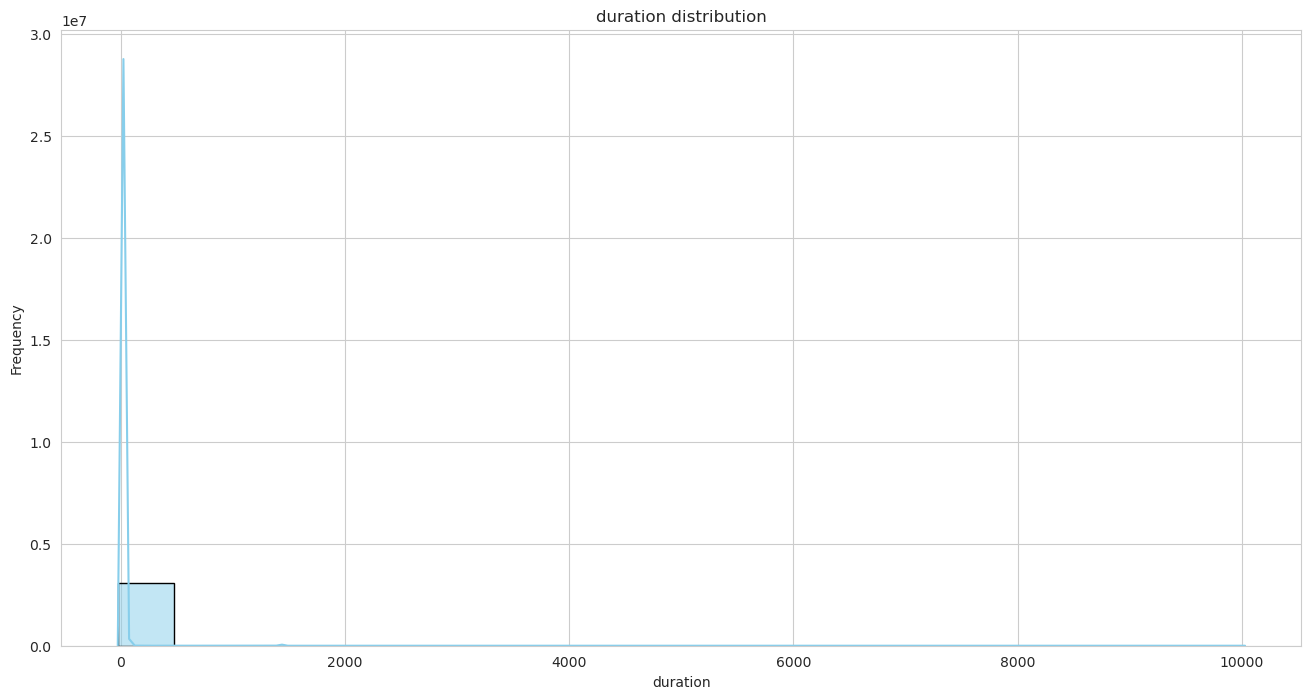

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set_style("whitegrid")
plt.figure(figsize=(16, 8))

# Create the histogram plot
sns.histplot(x='duration', data=df, bins=20, kde=True, color='skyblue', edgecolor='black')

# Add title and labels
plt.title('duration distribution')
plt.xlabel('duration')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [8]:
df.duration.max()

10029.183333333332

In [9]:
df = df[(df.duration >= 1) & (df.duration <= 60)].copy()

In [10]:
df.shape

(3009173, 20)

In [11]:
3009173 / 3066766

0.9812202822125979

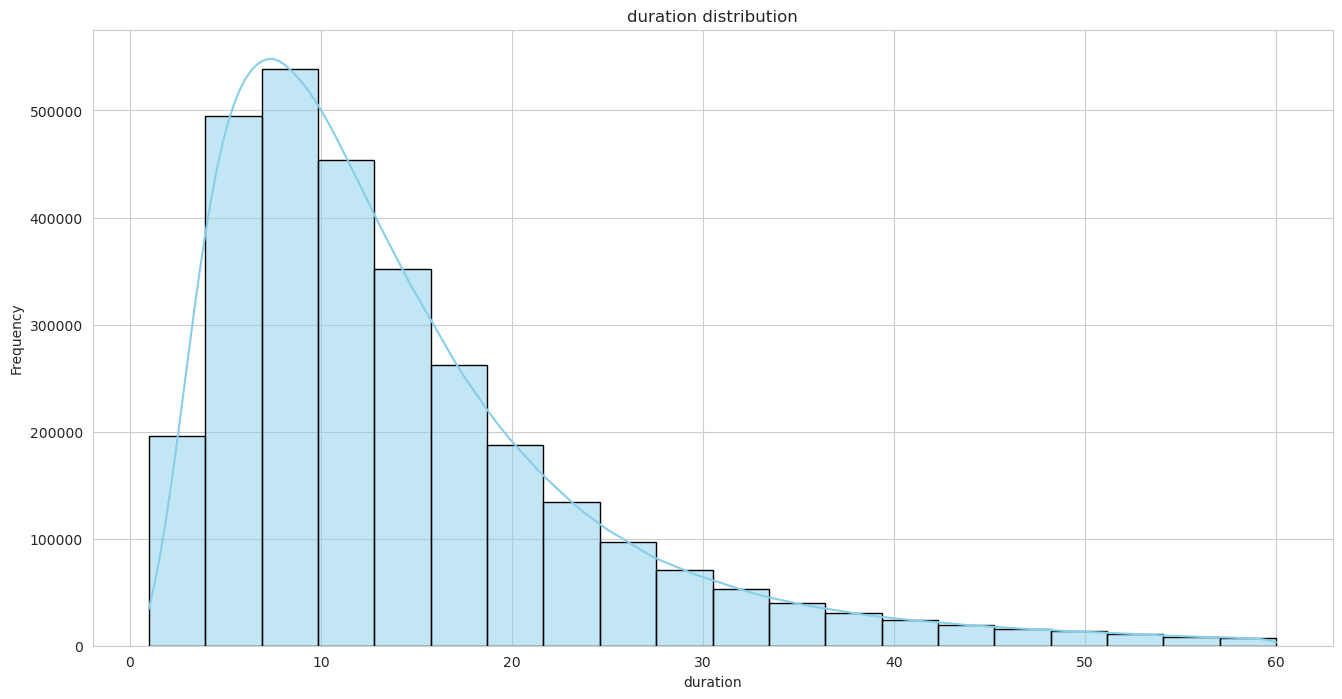

In [12]:
#replot 

# Set style
sns.set_style("whitegrid")
plt.figure(figsize=(16, 8))

# Create the histogram plot
sns.histplot(x='duration', data=df, bins=20, kde=True, color='skyblue', edgecolor='black')

# Add title and labels
plt.title('duration distribution')
plt.xlabel('duration')
plt.ylabel('Frequency')

# Show the plot
plt.show()


In [13]:
columns_to_be_used = ['PULocationID', 'DOLocationID']

df_filtered = df[columns_to_be_used].astype(str)

In [14]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00,8.433333
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00,6.316667
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00,12.750000
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25,9.616667
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00,10.833333


In [15]:
train_dicts = df_filtered.to_dict(orient='records')


In [16]:
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

In [17]:
X_train.shape

(3009173, 515)

In [18]:
y_train = df.duration

In [19]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

print(f'Train RMSE: {mean_squared_error(y_train, y_pred, squared=False)}')

Train RMSE: 7.649262443101424


In [20]:
def plot_predicted_vs_actual(y_true, y_pred):
    """
    Plots the predicted values against the actual values.
    
    Parameters:
    y_true (list or array-like): Actual values
    y_pred (list or array-like): Predicted values
    """
    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, color='blue', label='Data points')
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--', label='Ideal fit')

    # Add labels and title
    plt.xlabel('Actual Values (y_true)')
    plt.ylabel('Predicted Values (y_pred)')
    plt.title('Predicted vs Actual Values')
    plt.legend()
    plt.grid(True)

    # Show plot
    plt.show()

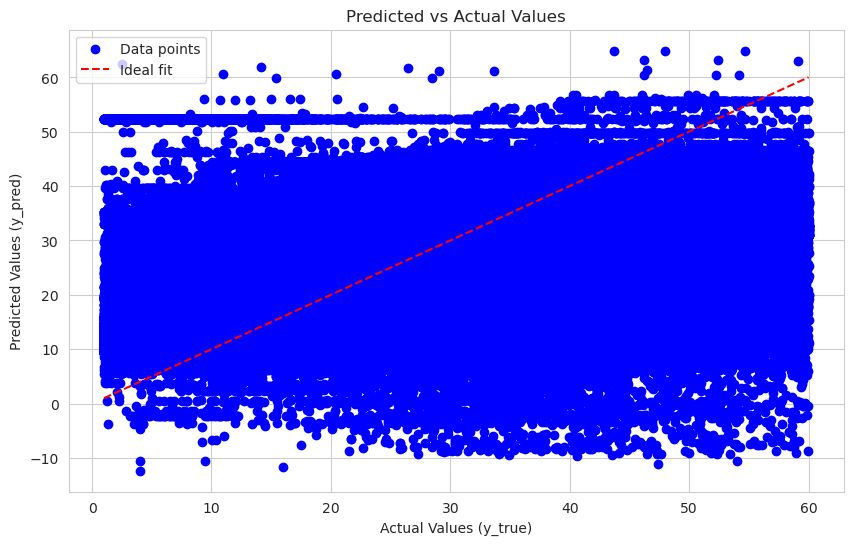

In [21]:
plot_predicted_vs_actual(y_train, y_pred)

In [22]:
categorical = ['PULocationID', 'DOLocationID']

def read_data(filename):
    df = pd.read_parquet(filename, engine='fastparquet')

    df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
    df.duration = df.duration.dt.total_seconds() / 60

    df = df[(df.duration >= 1) & (df.duration <= 60)].copy()

    df[categorical] = df[categorical].astype('str')
    
    return df

In [23]:
df_val = read_data('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet')

In [24]:
df_val.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,duration
0,1.0,2023-02-01 00:32:53,2023-02-01 00:34:34,2.0,0.30,1.0,N,142.0,163.0,2.0,4.4,3.50,0.5,0.00,0.0,1.0,9.40,2.5,0.00,1.683333
3,1.0,2023-02-01 00:29:33,2023-02-01 01:01:38,0.0,18.80,1.0,N,132.0,26.0,1.0,70.9,2.25,0.5,0.00,0.0,1.0,74.65,0.0,1.25,32.083333
4,2.0,2023-02-01 00:12:28,2023-02-01 00:25:46,1.0,3.22,1.0,N,161.0,145.0,1.0,17.0,1.00,0.5,3.30,0.0,1.0,25.30,2.5,0.00,13.300000
5,1.0,2023-02-01 00:52:40,2023-02-01 01:07:18,1.0,5.10,1.0,N,148.0,236.0,1.0,21.9,3.50,0.5,5.35,0.0,1.0,32.25,2.5,0.00,14.633333
6,1.0,2023-02-01 00:12:39,2023-02-01 00:40:36,1.0,8.90,1.0,N,137.0,244.0,1.0,41.5,3.50,0.5,3.50,0.0,1.0,50.00,2.5,0.00,27.950000


In [25]:
val_dicts = df_val[categorical].to_dict(orient='records')


In [29]:
X_val = dv.transform(val_dicts) 
y_val = df_val.duration

In [30]:
y_pred = lr.predict(X_val)


In [31]:
print(f'Val RMSE: {mean_squared_error(y_val, y_pred, squared=False)}')


Val RMSE: 13.328414086125777
